<a href="https://colab.research.google.com/github/Amjed-Darwez/Data-mining/blob/main/Car_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce que fait le code :

1.Installe la bibliothèque ultralytics qui contient le modèle YOLOv8, utilisé pour la détection d’objets.

2.Importe les modules nécessaires :

    YOLO pour utiliser le modèle YOLOv8.

    os pour gérer les chemins et fichiers.

    matplotlib.pyplot pour afficher les images et les résultats.

    cv2 (OpenCV) pour manipuler les images (lecture, transformation, etc.).

Pourquoi c’est important :

Cette cellule prépare l’environnement et les outils nécessaires pour toute la détection d’objets dans ton projet.

Sans ces bibliothèques, il serait impossible de charger, traiter et afficher les images avec YOLOv8.

In [1]:
# Install the ultralytics library that contains YOLOv8
!pip install ultralytics
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ce que fait le code :

    1.Charge un modèle YOLOv8 pré-entraîné nommé yolov8n.pt.

    2.Le suffixe n signifie nano, c’est la version la plus petite et la plus rapide du modèle YOLOv8, idéale pour tester rapidement ou pour des machines avec moins de ressources.

Pourquoi c’est important :

    -Le modèle pré-entraîné peut détecter des objets sans nécessiter un entraînement depuis zéro.

    -Cela permet de gagner du temps et d’évaluer rapidement les performances sur ton dataset.

    -Pour des projets réels, on peut ensuite affiner ce modèle (fine-tuning) sur nos données spécifiques.

In [2]:
# Load a pre-trained YOLOv8 nano model (smallest version for fast training/testing)
model = YOLO("yolov8n.pt")

Ce que fait le code :

    1.Permet de téléverser le fichier kaggle.json depuis ton ordinateur vers Colab.

    2.Ce fichier contient tes clés d’API Kaggle pour accéder aux datasets hébergés sur Kaggle.

    3.Utilise google.colab.files.upload() pour ouvrir une fenêtre et sélectionner le fichier sur ton PC.

Pourquoi c’est important :

    -Sans kaggle.json, il n’est pas possible de télécharger automatiquement les datasets depuis Kaggle.

    -Cette étape assure que le notebook peut accéder aux données nécessaires pour l’entraînement ou le test du modèle YOLOv8.

In [3]:
# Upload your kaggle.json file to access Kaggle datasets
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darwezamjed","key":"5a590ac79d12c56f481fefd481cf3738"}'}

Ce que fait le code :

    1.Crée un dossier caché .kaggle dans le répertoire home pour stocker en toute sécurité le fichier kaggle.json.

    2.Copie le fichier kaggle.json dans ce dossier.

    3.Modifie les permissions du fichier pour que seul l’utilisateur puisse le lire et l’écrire (chmod 600).

Pourquoi c’est important :

    -Assure la sécurité de tes clés d’API Kaggle, empêchant tout accès non autorisé.

    -Permet à l’outil Kaggle CLI (kaggle command) de fonctionner correctement pour télécharger les datasets.

    -Prépare le notebook pour un accès automatisé aux données depuis Kaggle.

In [4]:
# To download any dataset from Kaggle
# Create a hidden folder called `.kaggle` in the user's home directory
!mkdir -p ~/.kaggle
# Copy the kaggle.json file (API key) into the `.kaggle` folder
!cp kaggle.json ~/.kaggle/
# Change file permissions so only the user can read/write the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

Ce que fait le code :

    1.Importe la bibliothèque kagglehub, qui permet de télécharger des datasets depuis Kaggle facilement.

    2.Télécharge le dataset “Car Detection and Tracking” en utilisant la fonction dataset_download().

    3.Affiche le chemin local où les fichiers du dataset ont été téléchargés.

Pourquoi c’est important :

    -Automatise le téléchargement du dataset nécessaire pour l’entraînement et les tests du modèle YOLOv8.

    -Évite de télécharger manuellement les fichiers depuis le site Kaggle.

    -Assure que les fichiers sont prêts à être utilisés dans le notebook.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amitkumargurjar/car-detection-and-tracking-dataset")

print("Path to dataset files:", path)

100%|██████████| 380M/380M [00:04<00:00, 80.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2


Ce que fait le code :

    1.Définit extract_path comme le chemin où le dataset a été téléchargé.

    2.Affiche ce chemin pour confirmer l’emplacement des fichiers.

    3.Liste tous les fichiers et dossiers présents dans le dataset avec os.listdir().

Pourquoi c’est important :

    -Permet de vérifier rapidement que le dataset a été correctement téléchargé et extrait.

    -Aide à comprendre la structure des fichiers, ce qui est essentiel avant de commencer la préparation des données et l’entraînement du modèle.

In [6]:
extract_path = path
# Print path and show all files inside the dataset folder
print("Extracted files are located here:", extract_path)
print("Contents:", os.listdir(extract_path))

Extracted files are located here: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2
Contents: ['archive']


Ce que fait le code :

    1.Utilise os.listdir(extract_path) pour afficher tous les fichiers et dossiers présents dans le chemin du dataset.

    2.Permet de voir la structure exacte des données, par exemple les dossiers train, test, ou d’autres sous-dossiers.

Pourquoi c’est important :

    -Vérifier la structure des fichiers est essentiel avant de commencer la préparation des données et l’entraînement du modèle.

    -Cela aide à savoir où se trouvent les images et annotations, et comment les organiser pour YOLOv8.

In [7]:
# Return all files in this path
os.listdir(extract_path)

['archive']

Ce que fait le code :

    1.Crée le contenu d’un fichier YAML pour YOLOv8 qui décrit le dataset :

    -train : chemin des images d’entraînement

    -val : chemin des images de validation

    -nc : nombre de classes (ici 1 pour "car")

    -names : noms des classes

    2.Écrit ce contenu dans un fichier car_dataset.yaml dans le répertoire de travail.

    3.Vérifie que le fichier a bien été créé en listant les fichiers du répertoire courant.

Pourquoi c’est important :

    -YOLOv8 utilise ce fichier YAML pour savoir où se trouvent les données et quelles sont les classes.

    -C’est une étape essentielle avant de lancer l’entraînement du modèle sur notre dataset.

    -Facilite la gestion des chemins et des classes dans le notebook.

In [8]:
yaml_content = """
train: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/train
val: /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/val
nc: 1  # number of classes (1 = car)
names: ['car']
"""
# Create and save the YAML file in your working directory
with open('car_dataset.yaml', 'w') as f:
    f.write(yaml_content)
# Confirm the YAML file was created successfully
print("car_dataset.yaml created successfully.")
print(os.listdir('.'))

car_dataset.yaml created successfully.
['.config', 'kaggle.json', 'yolov8n.pt', 'car_dataset.yaml', 'sample_data']


Ce que fait le code :

    1.Définit la variable dataset_yaml comme le chemin vers le fichier YAML que nous venons de créer (car_dataset.yaml).

    2.Affiche ce chemin pour confirmer que le fichier est accessible et prêt à être utilisé.

Pourquoi c’est important :

    -YOLOv8 nécessite ce chemin pour charger correctement les données pendant l’entraînement ou l’évaluation.

    -Vérifier le chemin assure qu’il n’y aura pas d’erreurs liées au dataset lors de l’entraînement.

In [9]:
dataset_yaml = "/content/car_dataset.yaml"
dataset_yaml

'/content/car_dataset.yaml'

Ce que fait le code :

    1.Définit les chemins vers les dossiers d’entraînement et de validation à partir du dataset téléchargé :

    -train_data_path → images d’entraînement

    -val_data_path → images de validation

    2.Crée un fichier YAML pour YOLOv8 qui indique :

    -Les chemins d’accès aux images (train et val)

    -Le nombre de classes (nc = 1)

    -Le nom des classes (['car'])

    3.Charge le modèle YOLOv8 nano pré-entraîné avec :

    -model = YOLO("yolov8n.pt")


    Lance l’entraînement du modèle avec les paramètres :

    -data=dataset_yaml → fichier YAML du dataset

    -epochs=13 → nombre d’époques

    -imgsz=640 → taille des images

    -batch=8 → taille du lot pour l’entraînement

    4.project="car_detection" et name="yolov8_car" → nom du projet et du modèle entraîné

Pourquoi c’est important :

    -Prépare le modèle pour détecter des voitures en utilisant ton dataset spécifique.

    -Permet au modèle de s’adapter à ton jeu de données tout en partant d’un modèle pré-entraîné pour gagner du temps.

    -L’entraînement produit les poids du modèle et les résultats qui seront utilisés pour la détection sur de nouvelles images.

In [11]:
# The following line was causing a syntax error and has been commented out or removed.
# Rewan Gamal 10:06 PM

# the original dataset path if it were downloaded directly from Kaggle
extract_path = path
# paths to the training and validation folders after using kagglehub to download the dataset
train_data_path = os.path.join(extract_path, "archive", "train")
val_data_path = os.path.join(extract_path, "archive", "val")
# This is the YAML content YOLO uses to locate the images and know how many classes there are
yaml_content = f"""
train: {train_data_path}
val: {val_data_path}
nc: 1
names: ['car']
"""
with open('car_dataset.yaml', 'w') as f:
    f.write(yaml_content)
dataset_yaml = "/content/car_dataset.yaml"

# Using YOLOv8n in the model
model = YOLO("yolov8n.pt")
model.train(data=dataset_yaml, epochs=13, imgsz=640, batch=8, project="car_detection", name="yolov8_car")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=13, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_car2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797b3c1d3d70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Ce que fait le code :

    1.Définit le chemin vers une image d’entraînement (train_img).

    2.Utilise le modèle YOLOv8 entraîné pour faire une prédiction sur cette image avec :

    -results = model.predict(train_img, save=True)
    ...save=True permet de sauvegarder l’image avec les détections.

    4.Si des résultats sont présents, affiche la première image avec les boîtes englobantes autour des voitures détectées :

    -results[0].show()


Pourquoi c’est important :

    -Permet de vérifier visuellement la performance du modèle sur des images du dataset.

    -C’est une étape clé pour valider que le modèle détecte correctement les objets (ici les voitures).

    -Les images sauvegardées peuvent être utilisées pour des rapports ou présentations afin de montrer les résultats.


image 1/1 /content/car_detection/yolov8_car2/train_batch152.jpg: 640x640 21 cars, 9.8ms
Speed: 5.5ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


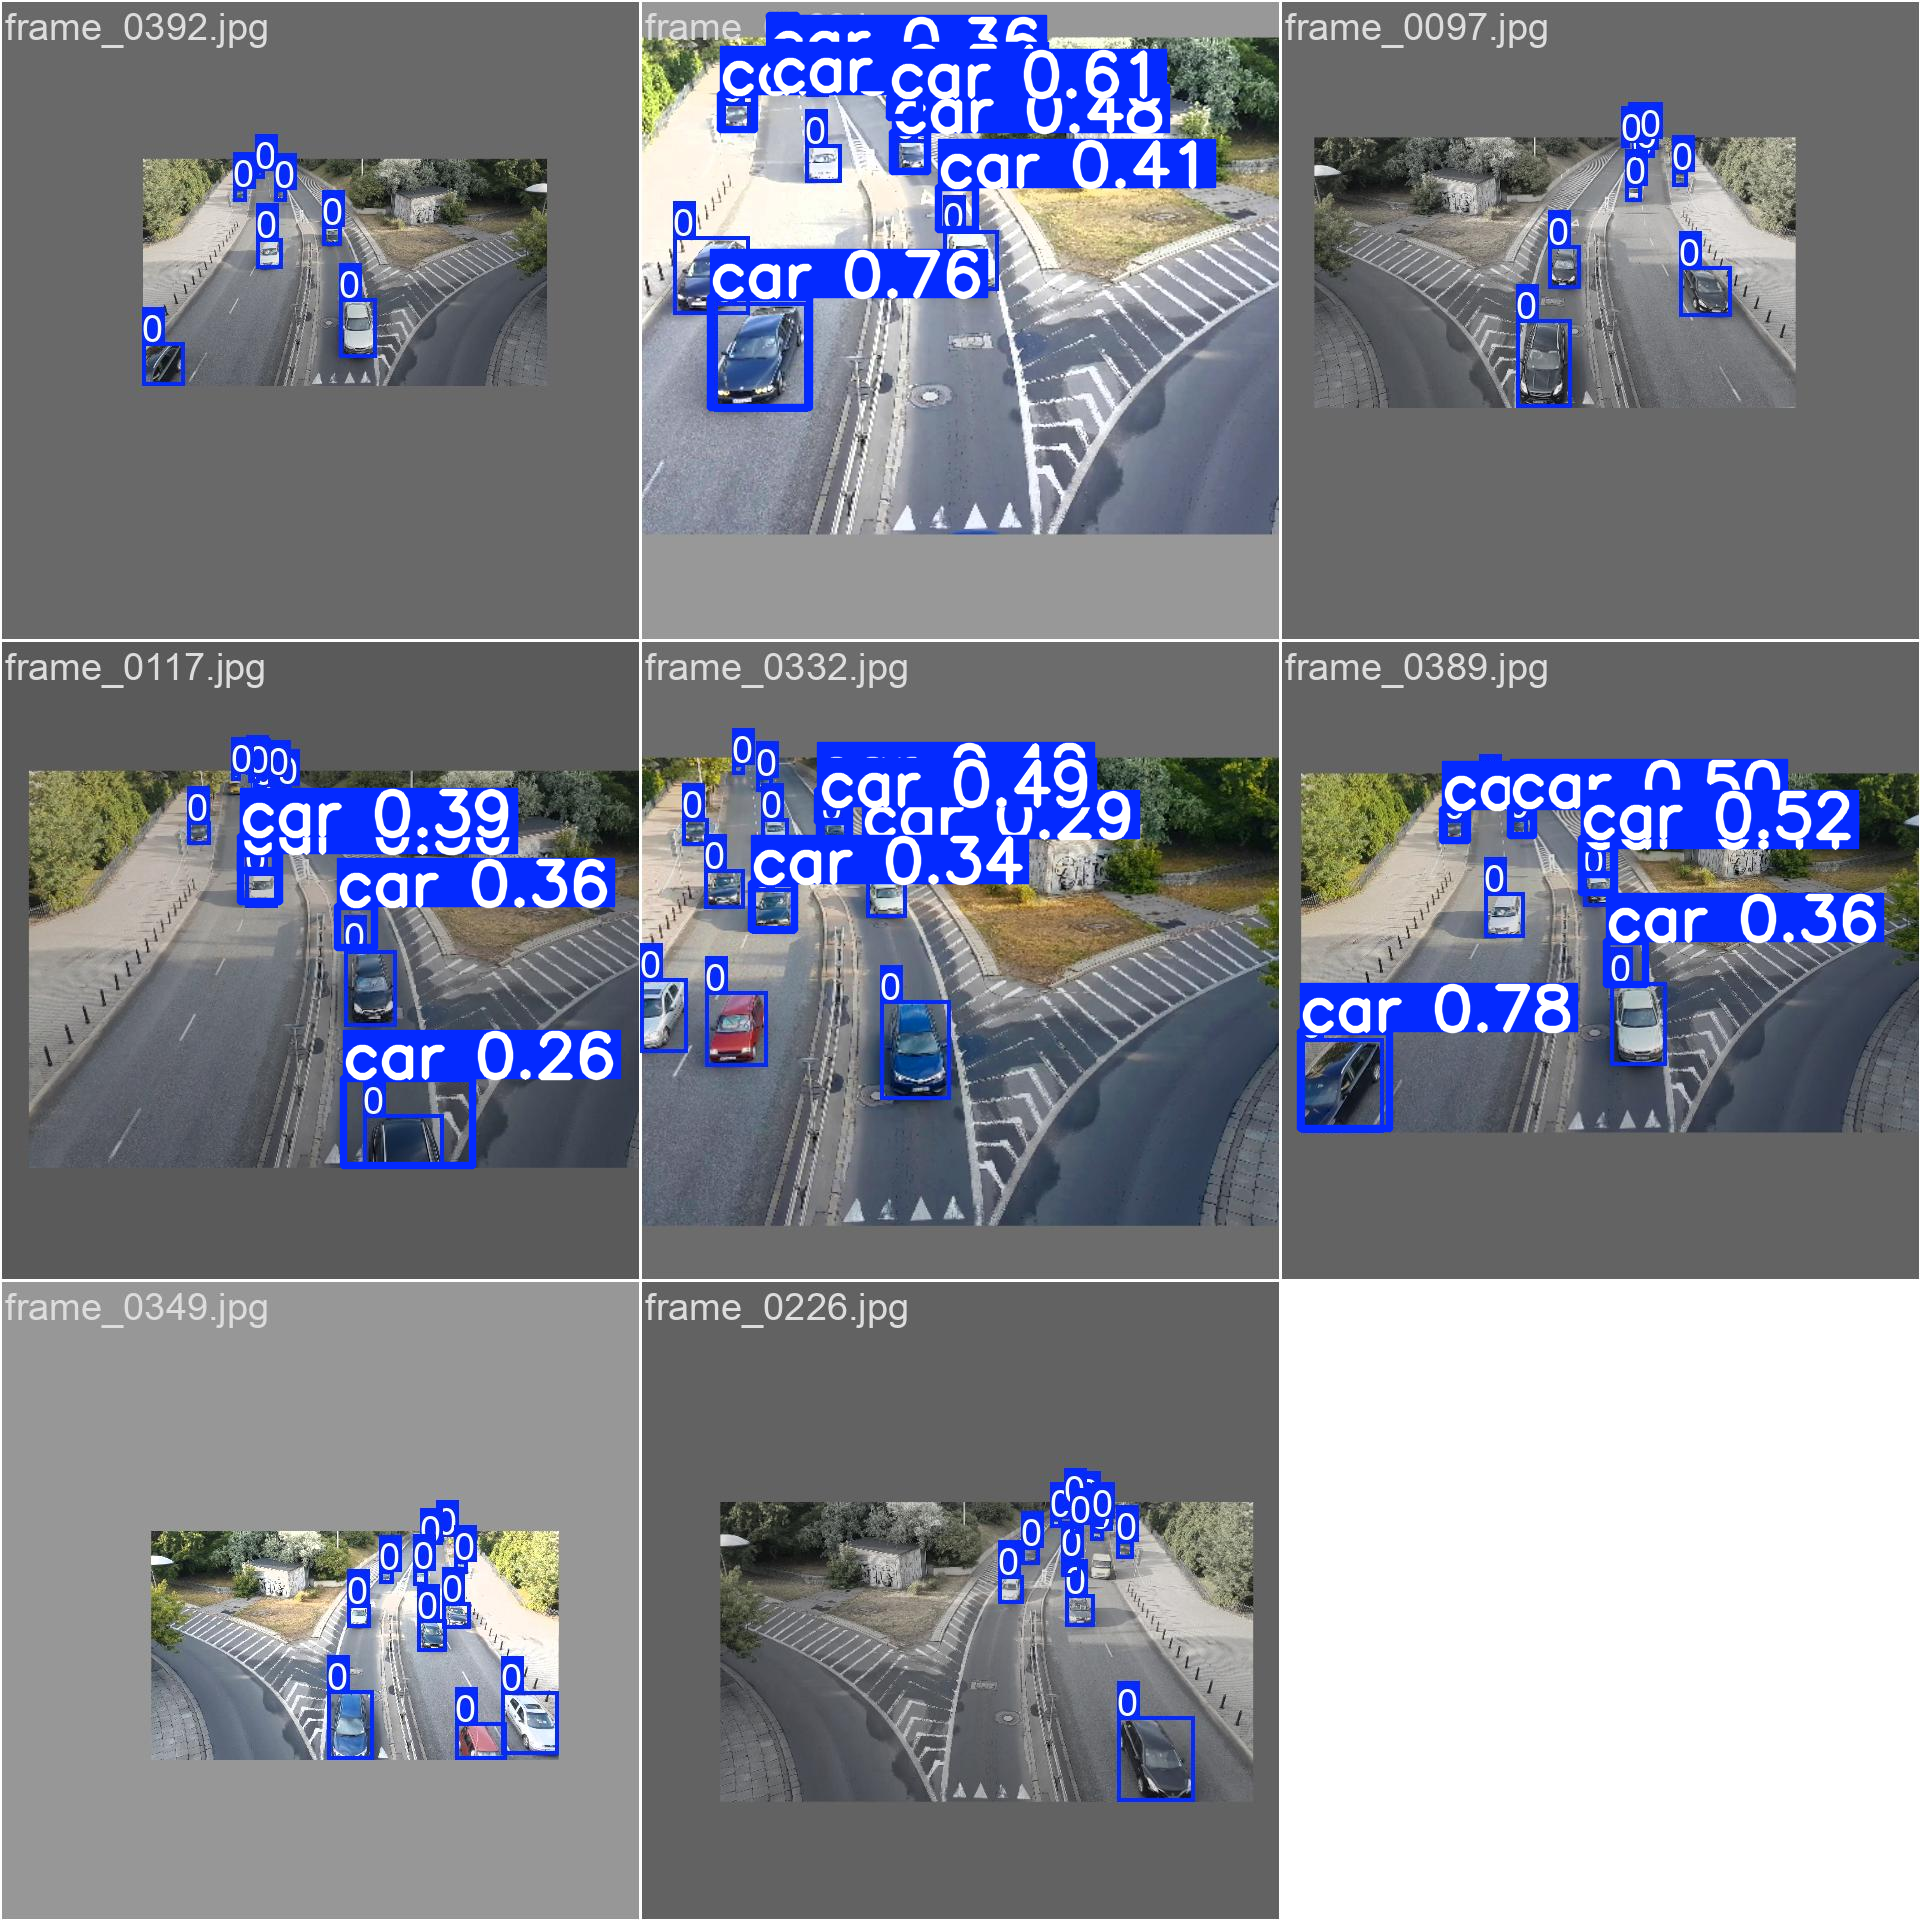

In [12]:
train_img = "/content/car_detection/yolov8_car2/train_batch152.jpg"
results = model.predict(train_img, save=True)
if results:
    results[0].show()  # Display the first image with bounding boxes

Ce que fait le code :

    1.Importe le module glob, qui permet de chercher des fichiers selon un motif spécifique (pattern).

    2.Récupère les fichiers correspondant au motif "/content/car_detection/yolov8_car3/BoxPR_curve.png" et les stocke dans test_images.

    3.Pour chaque image trouvée, le modèle YOLOv8 prédit les objets présents et sauvegarde les images avec les boîtes englobantes grâce à save=True.

Pourquoi c’est important :

    -Permet de tester le modèle sur plusieurs images à la fois.

    -Automatise le processus de prédiction et de sauvegarde des résultats pour analyse ou présentation.

    -Utile pour évaluer visuellement la performance du modèle sur différents exemples.

In [13]:
# Import glob to search for images by file pattern
import glob
test_images = glob.glob("/content/car_detection/yolov8_car3/BoxPR_curve.png")
for img in test_images:
    results = model.predict(img, save=True)

Ce que fait le code :

    1.Importe la bibliothèque glob pour chercher des fichiers correspondant à un motif spécifique.

    2.Cherche les images correspondant au chemin "/content/car_detection/yolov8_car3/BoxPR_curve.png" et les stocke dans test_images.

    3.Pour chaque image trouvée :

    -Le modèle YOLOv8 prédit la position des objets.

    -save=True sauvegarde les images avec les boîtes englobantes montrant les détections.

Pourquoi c’est important :

    -Permet de tester automatiquement plusieurs images avec le modèle entraîné.

    -Facilite l’évaluation visuelle de la performance du modèle sur différents exemples.

    -Les images sauvegardées peuvent être utilisées pour illustrer les résultats dans un rapport ou une présentation.

In [23]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])
    ))
test_img = list(uploaded.keys())[0]

Saving download.jpeg to download.jpeg
User uploaded file "download.jpeg" with length 6045 bytes


Ce que fait le code :

    1.Utilise la méthode model.val() pour évaluer la performance du modèle YOLOv8 sur le dataset de validation.

    2.Calcule automatiquement les métriques clés telles que :

    -Precision (Précision)

    -Recall (Rappel)

    -mAP50 et mAP50-95 (mean Average Precision)

Pourquoi c’est important :

    -Permet de mesurer quantitativement la qualité de la détection du modèle.

    -Aide à identifier si le modèle détecte correctement les voitures et si des améliorations sont nécessaires.

    -Les résultats peuvent être utilisés pour comparer différents modèles ou configurations.

In [24]:
#Evaluate the trained model
results = model.val()

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2929.5±1619.9 MB/s, size: 783.1 KB)
val: Scanning /root/.cache/kagglehub/datasets/amitkumargurjar/car-detection-and-tracking-dataset/versions/2/archive/val/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 99/99 60.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.0it/s 3.5s
                   all         99        644      0.838      0.793      0.852      0.669
Speed: 4.2ms preprocess, 3.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/runs/detect/val4


Ce que fait le code :

    1.Utilise le modèle YOLOv8 entraîné pour faire une prédiction sur l’image téléversée (test_img).

    2.save=True permet de sauvegarder l’image avec les boîtes englobantes indiquant les objets détectés.

    3.results[0].show() affiche directement l’image avec les détections visibles dans le notebook.

Pourquoi c’est important :

    -Permet de tester le modèle sur des images personnalisées fournies par l’utilisateur.

    -Aide à visualiser concrètement les performances du modèle en termes de détection.

    -Les images sauvegardées peuvent être utilisées dans des rapports ou des présentations pour illustrer les résultats.


image 1/1 /content/download.jpeg: 480x640 1 car, 40.5ms
Speed: 4.7ms preprocess, 40.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict


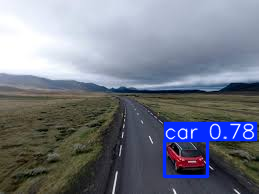

In [25]:
results = model.predict(test_img, save=True)
results[0].show()